# Train Test spit is 8:2 and cross validation folds is 5

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Prediction of O using AE and M : RFC
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9576636613092905
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1631
           1       0.99      0.89      0.93      1738
           2       1.00      1.00      1.00      1733

    accuracy                           0.96      5102
   macro avg       0.96      0.96      0.96      5102
weighted avg       0.96      0.96      0.96      5102



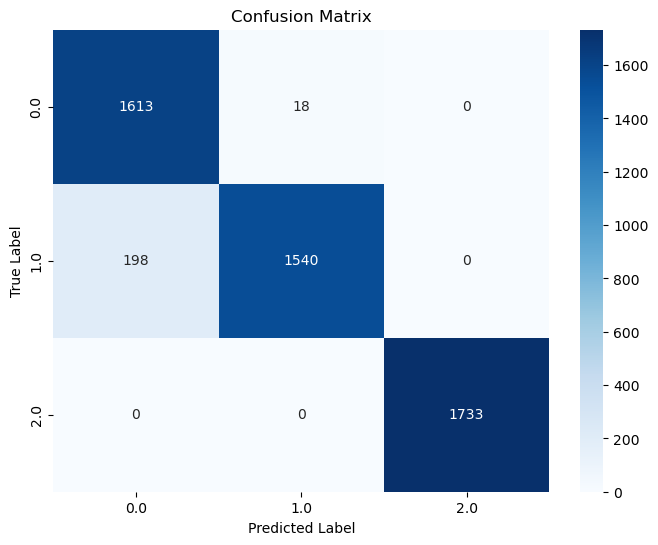

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O) 
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']]  

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.2, random_state=42)

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_rf_model = grid_search.best_estimator_
print("Prediction of O using AE and M : RFC")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Prediction of O using AE and M : KNN
Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.9562916503332026
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1631
           1       0.98      0.89      0.93      1738
           2       1.00      1.00      1.00      1733

    accuracy                           0.96      5102
   macro avg       0.96      0.96      0.96      5102
weighted avg       0.96      0.96      0.96      5102



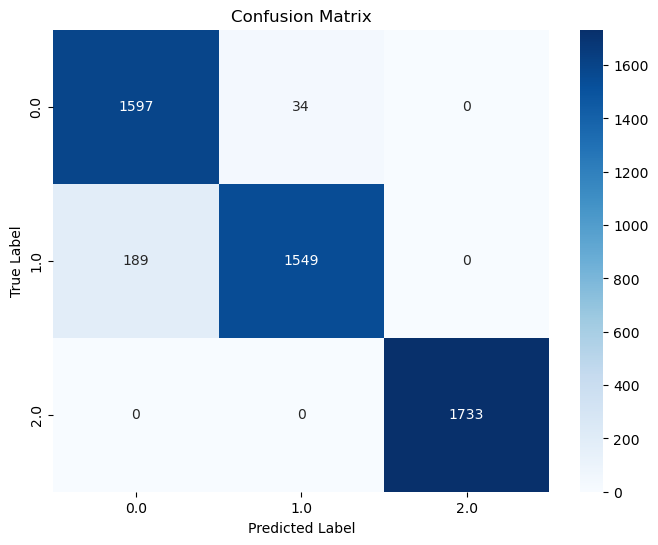

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O)
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']] 

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.2, random_state=42)

# Create a KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # How to weight points (uniform or distance)
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_knn_model = grid_search.best_estimator_
print("Prediction of O using AE and M : KNN")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_knn_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Prediction of O using AE and M : Naive Bayes
Accuracy: 0.4882399059192474
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03      1631
           1       0.40      1.00      0.57      1738
           2       1.00      0.42      0.59      1733

    accuracy                           0.49      5102
   macro avg       0.80      0.48      0.40      5102
weighted avg       0.80      0.49      0.41      5102



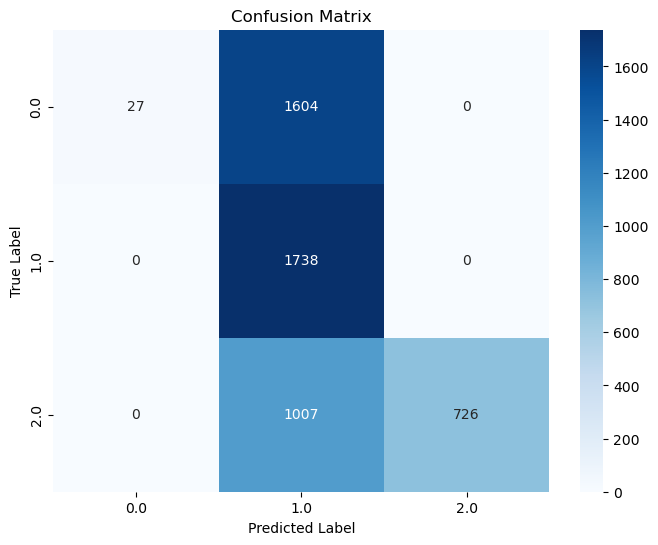

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O) 
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']]  

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Prediction of O using AE and M : Naive Bayes")
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Prediction of O using AE and EC : GBM
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.9590356722853783
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1631
           1       0.99      0.89      0.94      1738
           2       1.00      1.00      1.00      1733

    accuracy                           0.96      5102
   macro avg       0.96      0.96      0.96      5102
weighted avg       0.96      0.96      0.96      5102



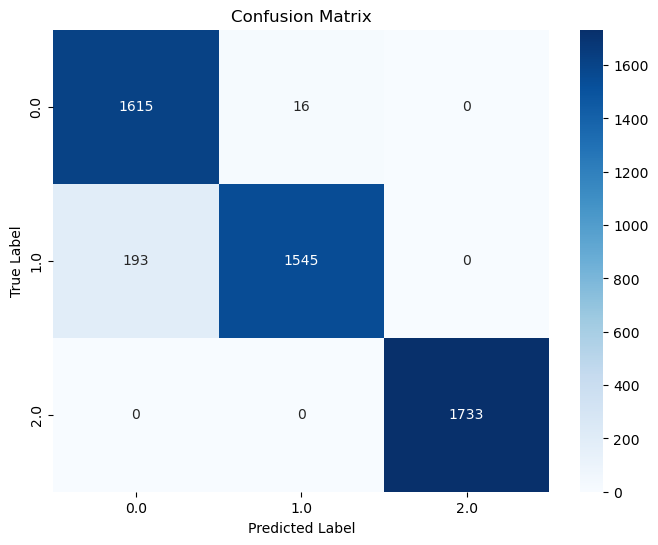

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']] 

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.2, random_state=42)

# Create a GradientBoostingClassifier model
gbm_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_gbm_model = grid_search.best_estimator_
print("Prediction of O using AE and EC : GBM")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_gbm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Train Test spit is 7:3 and cross validation folds is 9

Fitting 9 folds for each of 216 candidates, totalling 1944 fits
Prediction of O using AE and M : RFC
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.9570103227492487
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2436
           1       0.99      0.89      0.93      2645
           2       1.00      1.00      1.00      2572

    accuracy                           0.96      7653
   macro avg       0.96      0.96      0.96      7653
weighted avg       0.96      0.96      0.96      7653



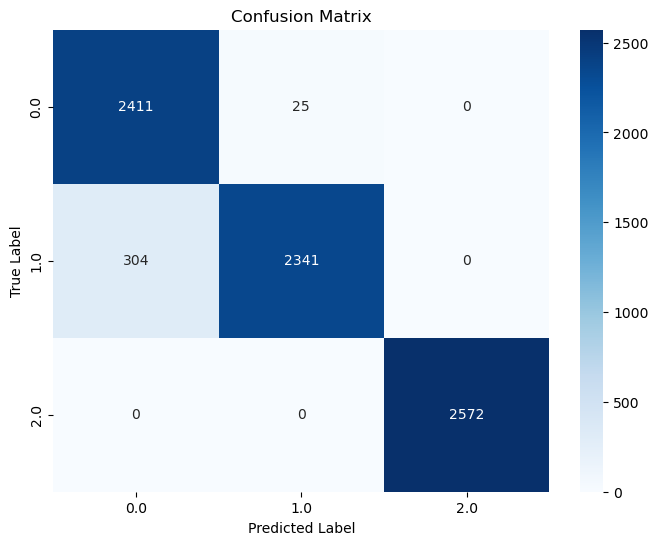

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O) 
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']]  

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.3, random_state=42)

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=9, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_rf_model = grid_search.best_estimator_
print("Prediction of O using AE and M : RFC")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 9 folds for each of 16 candidates, totalling 144 fits
Prediction of O using AE and M : KNN
Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.9553116424931399
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2436
           1       0.98      0.89      0.93      2645
           2       1.00      1.00      1.00      2572

    accuracy                           0.96      7653
   macro avg       0.96      0.96      0.96      7653
weighted avg       0.96      0.96      0.96      7653



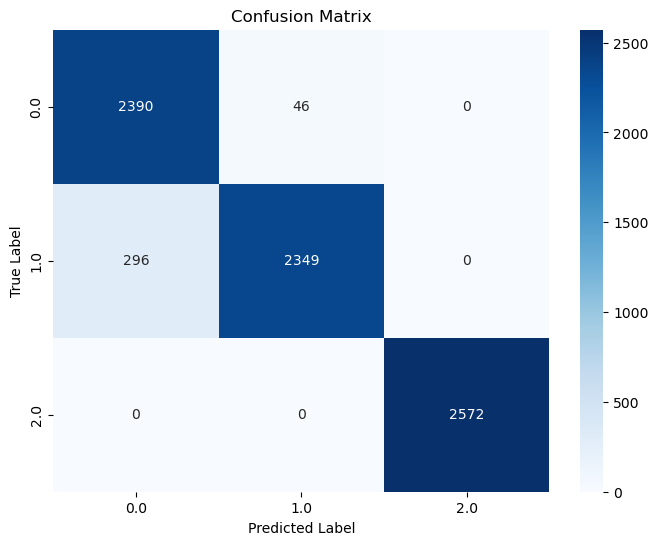

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O)
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']] 

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.3, random_state=42)

# Create a KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # How to weight points (uniform or distance)
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=9, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_knn_model = grid_search.best_estimator_
print("Prediction of O using AE and M : KNN")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_knn_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Prediction of O using AE and M : Naive Bayes
Accuracy: 0.491702600287469
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.03      2436
           1       0.40      1.00      0.58      2645
           2       1.00      0.42      0.59      2572

    accuracy                           0.49      7653
   macro avg       0.80      0.48      0.40      7653
weighted avg       0.79      0.49      0.41      7653



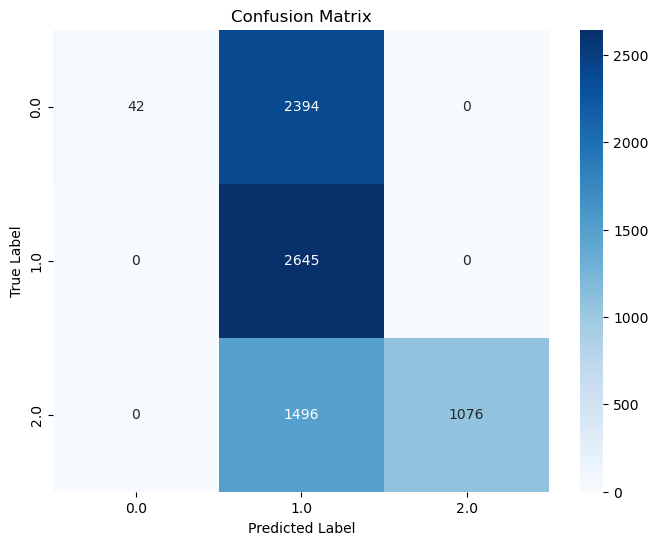

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O) 
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']]  

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Prediction of O using AE and M : Naive Bayes")
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 9 folds for each of 486 candidates, totalling 4374 fits
Prediction of O using AE and EC : GBM
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.9576636613092905
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2436
           1       0.99      0.89      0.94      2645
           2       1.00      1.00      1.00      2572

    accuracy                           0.96      7653
   macro avg       0.96      0.96      0.96      7653
weighted avg       0.96      0.96      0.96      7653



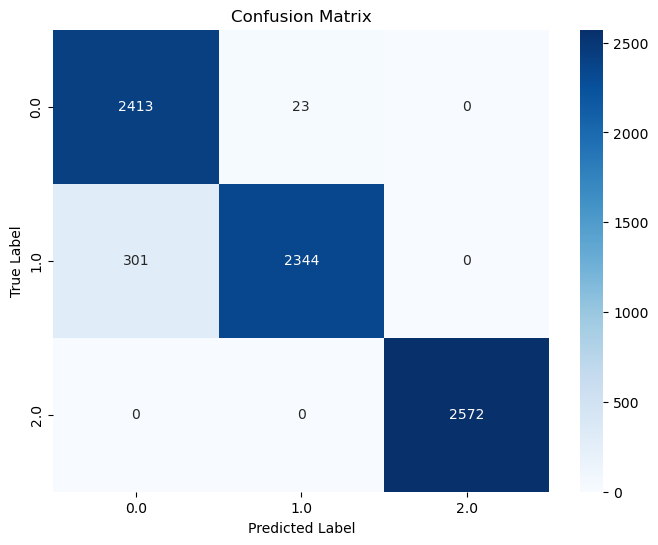

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']] 

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.3, random_state=42)

# Create a GradientBoostingClassifier model
gbm_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=9, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_gbm_model = grid_search.best_estimator_
print("Prediction of O using AE and EC : GBM")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_gbm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Changing Train Test split to 6:4 and cross validation folds to 7

Fitting 7 folds for each of 216 candidates, totalling 1512 fits
Prediction of O using AE and M : RFC
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9569776558212466
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3218
           1       0.99      0.89      0.93      3554
           2       1.00      1.00      1.00      3432

    accuracy                           0.96     10204
   macro avg       0.96      0.96      0.96     10204
weighted avg       0.96      0.96      0.96     10204



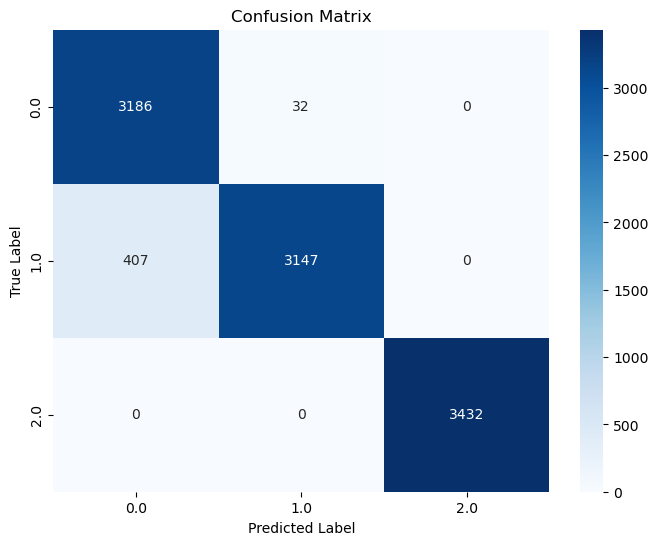

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O) 
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']]  

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.4, random_state=42)

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=7, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_rf_model = grid_search.best_estimator_
print("Prediction of O using AE and M : RFC")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 7 folds for each of 16 candidates, totalling 112 fits
Prediction of O using AE and M : KNN
Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.9561936495491964
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3218
           1       0.98      0.89      0.93      3554
           2       1.00      1.00      1.00      3432

    accuracy                           0.96     10204
   macro avg       0.96      0.96      0.96     10204
weighted avg       0.96      0.96      0.96     10204



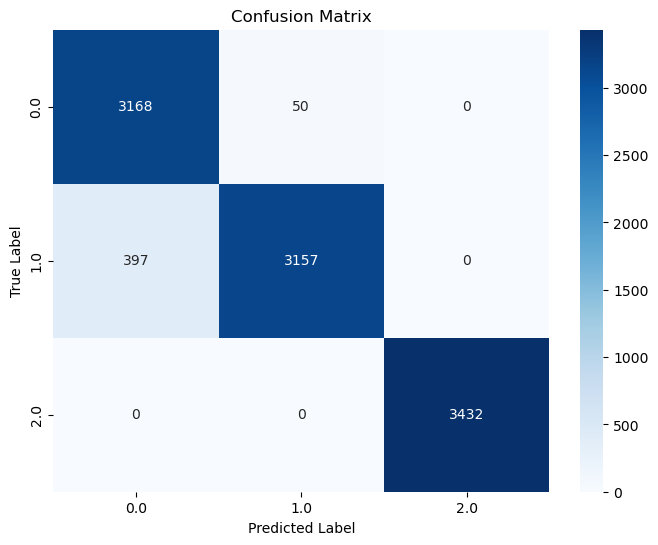

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O)
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']] 

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.4,random_state=42)

# Create a KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # How to weight points (uniform or distance)
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=7, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_knn_model = grid_search.best_estimator_
print("Prediction of O using AE and M : KNN")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_knn_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Prediction of O using AE and M : Naive Bayes
Accuracy: 0.4972559780478244
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04      3218
           1       0.41      1.00      0.58      3554
           2       1.00      0.42      0.60      3432

    accuracy                           0.50     10204
   macro avg       0.80      0.48      0.41     10204
weighted avg       0.79      0.50      0.41     10204



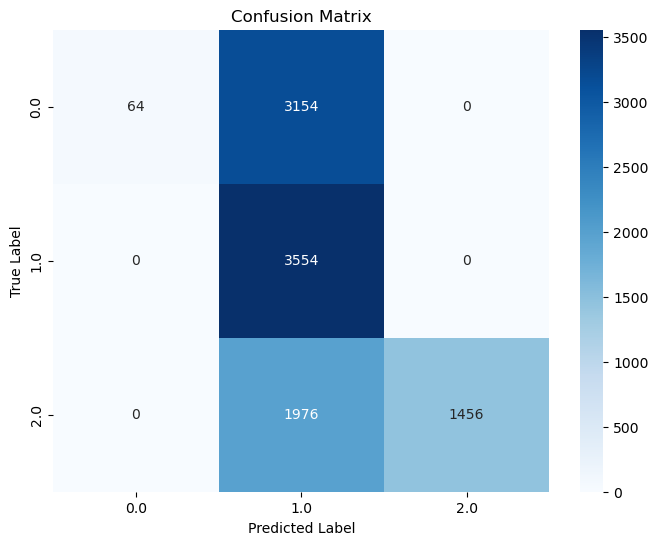

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O) 
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']]  

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.4, random_state=42)

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Prediction of O using AE and M : Naive Bayes")
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 7 folds for each of 486 candidates, totalling 3402 fits
Prediction of O using AE and EC : GBM
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.9569776558212466
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3218
           1       0.99      0.88      0.93      3554
           2       1.00      1.00      1.00      3432

    accuracy                           0.96     10204
   macro avg       0.96      0.96      0.96     10204
weighted avg       0.96      0.96      0.96     10204



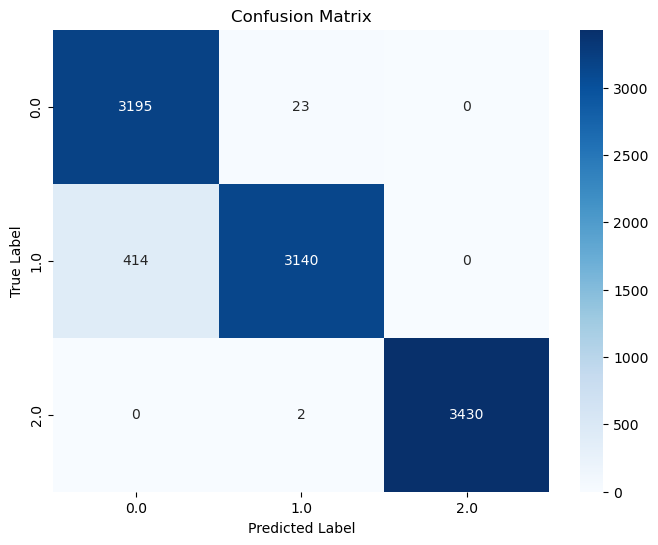

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in M, AE, and O columns
data_cleaned = data.dropna(subset=['M', 'AE', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['M', 'AE']] 

# Apply standard scaling to the 'M' and 'AE' features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.4, random_state=42)

# Create a GradientBoostingClassifier model
gbm_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=7, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_gbm_model = grid_search.best_estimator_
print("Prediction of O using AE and EC : GBM")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_gbm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
b 